# Regressão 01 - tarefa 03 - transformações em X e Y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import load_dataset
import sklearn
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#data for exercise 1 & 2
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
#Data: "previsao_de_renda.csv" for Exercise 3.
renda = '/content/previsao_de_renda.csv'
df = pd.read_csv(renda)
df.head(5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [4]:
#Design matrix using patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [5]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [6]:
#Removing non-significant variables
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.64e-20
Time:                        19:35:08   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando o intervalo de confiança ([0.025, 0.975]) como referência, sabendo que quanto mais próximo de 0 melhor, e considerando que as variáveis com valor absoluto de P>|t| maior que 0.5 não são confiáveis, observa-se que somente a variável net_bill é considerada estatisticamente significante.

In [7]:
#variation of R2 is 0.002
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg_tip = sm.OLS(y,X).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           5.02e-23
Time:                        19:35:08   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

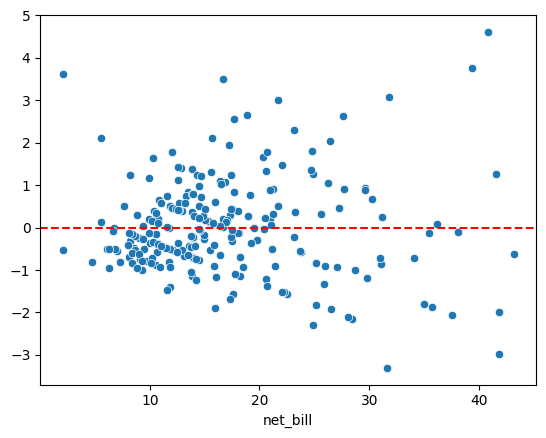

In [8]:
#Residual plot as a function of net_bill.
sns.scatterplot(x = 'net_bill', y = reg_tip.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [9]:
#Transforming net_bill into a logarithm and a polynomial.
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
reg_log = sm.OLS(y, X).fit()
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           4.40e-20
Time:                        19:35:08   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

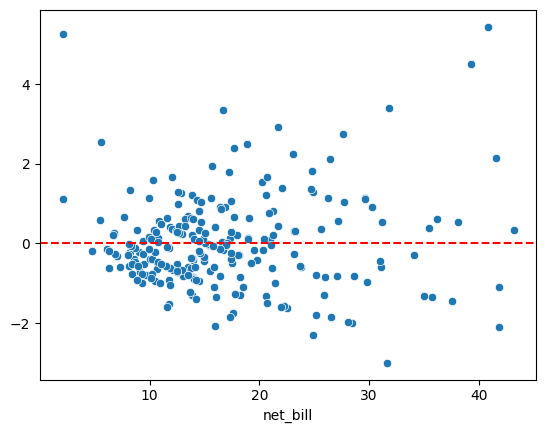

In [10]:
#Residual plot as a function of log net_bill.
sns.scatterplot(x = 'net_bill', y = reg_log.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

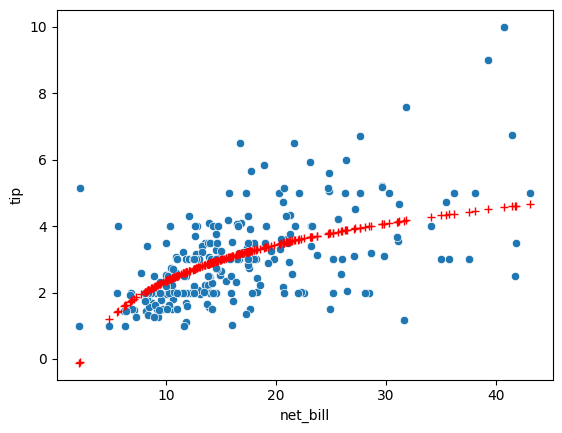

In [11]:
sns.scatterplot(x = 'net_bill', y = 'tip', data = tips)
plt.plot(tips['net_bill'], reg_log.fittedvalues, 'r+')

In [12]:
y, X = patsy.dmatrices('tip ~ net_bill + np.power(net_bill,2)', tips)
reg_power = sm.OLS(y, X).fit()
reg_power.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           4.96e-22
Time:                        19:35:11   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

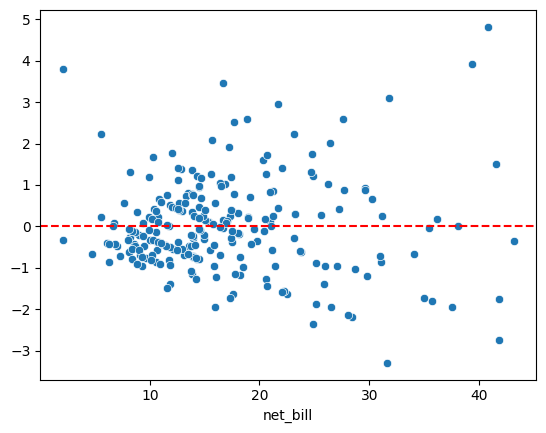

In [13]:
#Residual plot as a function of power net_bill.
sns.scatterplot(x = 'net_bill', y = reg_power.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

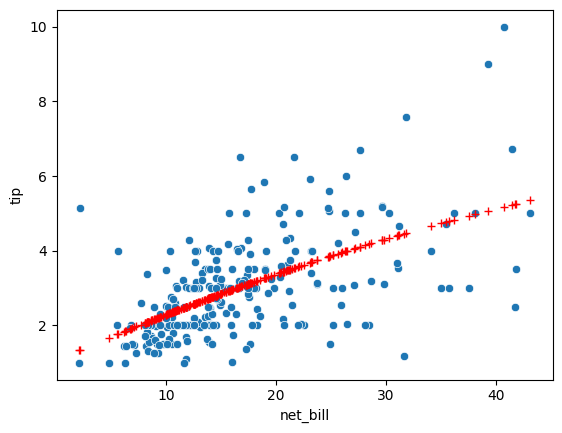

In [14]:
sns.scatterplot(x = 'net_bill', y = 'tip', data = tips)
plt.plot(tips['net_bill'], reg_power.fittedvalues, 'r+')

The chosen model is the one with the highest R-squared, which is for the logarithm and polynomial model reg_power (0.334).

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [15]:
#Creating the design matrix in the model with the logarithm of "tip," explained by "sex," "smoker," "diner," and "net_bill
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
modelo_2 = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.64e-20
Time:                        19:35:12   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Removing the non-significant variables.
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)

modelo_2 = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.64e-20
Time:                        19:35:12   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

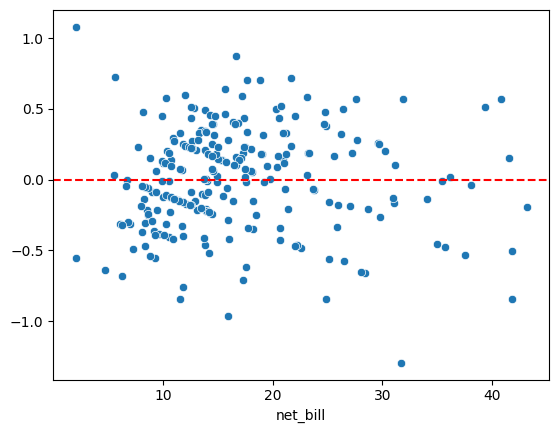

In [17]:
#Residual plot as a function of net_bill.
sns.scatterplot(x = 'net_bill', y = modelo_2.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [18]:
#Transforming net_bill into a logarithm and a polynomial.
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
reg_log_2 = sm.OLS(y, X).fit()
reg_log_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           5.62e-22
Time:                        19:35:12   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

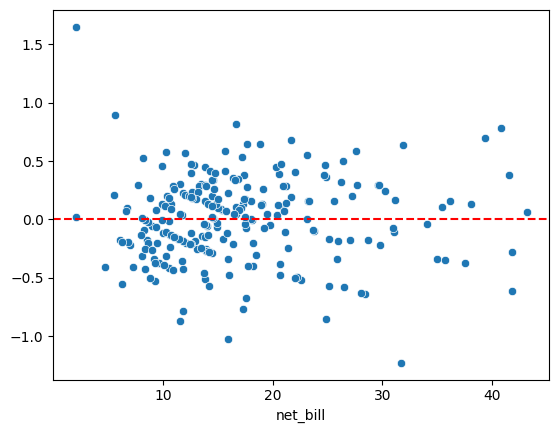

In [19]:
#Residual plot as a function of log net_bill.
sns.scatterplot(x = 'net_bill', y = reg_log_2.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

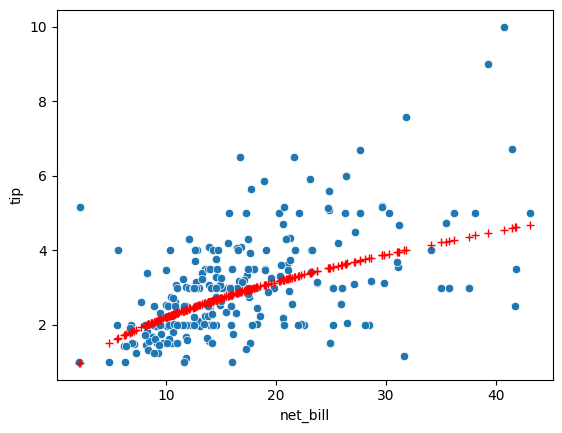

In [20]:
reg_exp_fit = np.exp(reg_log_2.fittedvalues)

sns.scatterplot(x = 'net_bill', y = 'tip', data = tips)
plt.plot(tips['net_bill'], reg_exp_fit, 'r+')

In [21]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill + np.power(net_bill,2)', tips)
reg_power_2 = sm.OLS(y, X).fit()
reg_power_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.82e-22
Time:                        19:35:13   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

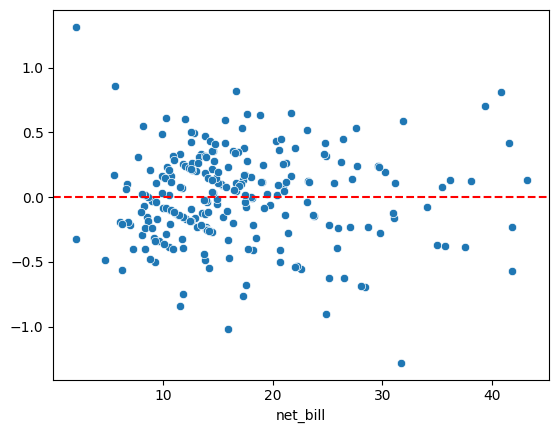

In [22]:
#Residual plot as a function of power net_bill.
sns.scatterplot(x = 'net_bill', y = reg_power_2.resid, data = tips)
plt.axhline(y=0, color='r', linestyle='--')

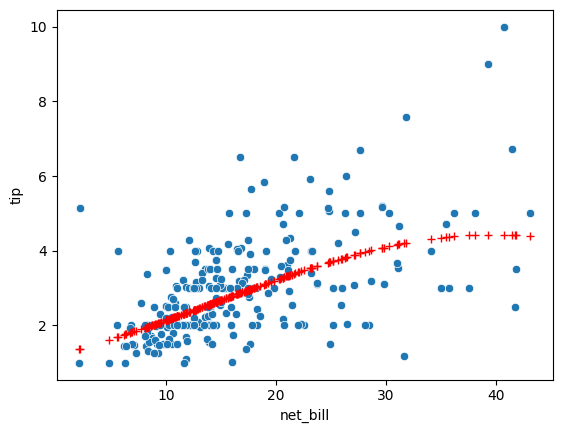

In [23]:
reg_power_fit = np.exp(reg_power_2.fittedvalues)

sns.scatterplot(x = 'net_bill', y = 'tip', data = tips)
plt.plot(tips['net_bill'], reg_power_fit, 'r+')


Even though they appear very similar graphically, after transforming "net_bill" into a logarithm and applying a polynomial, the "reg_power_2" model yielded a higher R-squared value of 0.338.

In [24]:
#Calculate the R-squared on the "tip" scale (without the logarithm). Compare it with the model from item 1.
tips['pred_tip_log'] = np.exp(reg_log_2.fittedvalues)

print('`reg_log_2` R-squared:', tips[['pred_tip_log', 'tip']].corr().iloc[0,1]**2)

tips['pred_tip_pow'] = np.exp(reg_power_2.fittedvalues)
print('`reg_power_2` R-squared:', tips[['pred_tip_pow', 'tip']].corr().iloc[0,1]**2)

`reg_log_2` R-squared: 0.32837743855275553
`reg_power_2` R-squared: 0.3290849111468202


The R-squared of the model from item 1 is still higher, with a value of 0.334.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [62]:
#simple linear regression model to explain income as the response variable, using time_employed as the explanatory variable.
reg = smf.ols(formula='renda ~ tempo_emprego', data=df).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:52:12   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
df['renda_predict'] = reg.predict(df)

print('R-squared:',df[['renda_predict', 'renda']].corr().iloc[0,1]**2)

R-squared: 0.15542139607044392


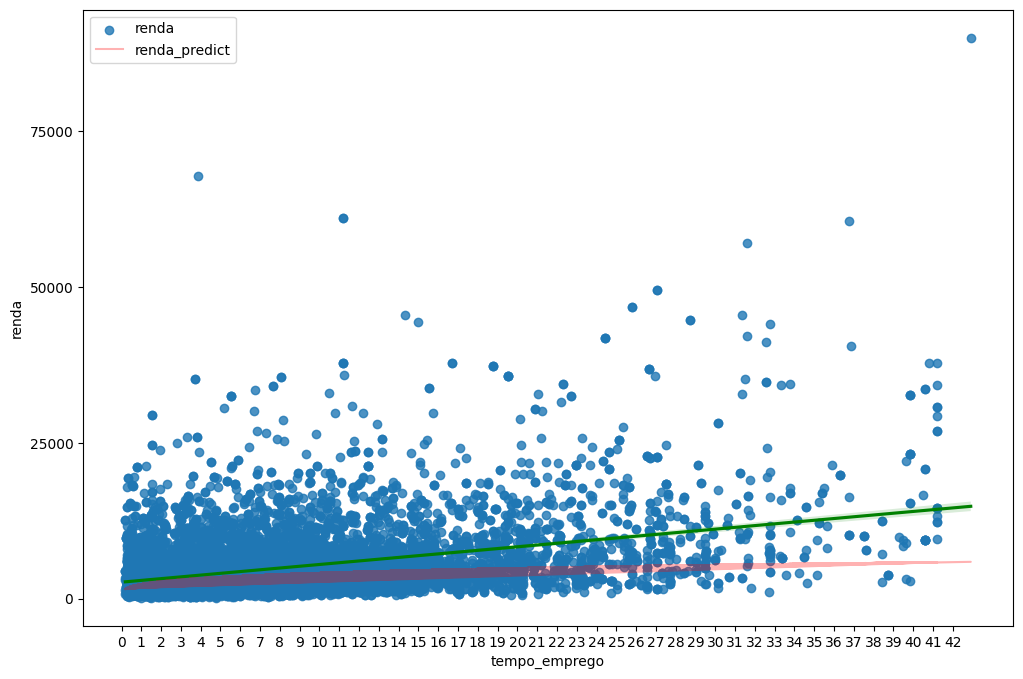

In [90]:
plt.figure(figsize=(12,8))

sns.regplot(x='tempo_emprego',y='renda',data=df,label='renda', line_kws={'color': 'green'})
plt.plot(df['tempo_emprego'], df['renda_predict'], 'r', alpha =.3, label='renda_predict')
plt.legend()

plt.xticks(ticks=np.arange(stop=df['tempo_emprego'].max(), step=1))
plt.yticks(ticks=np.arange(stop=df['renda'].max(), step=25000,))

plt.show()

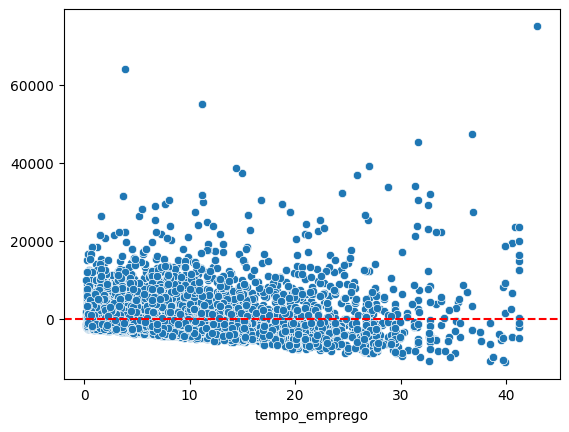

In [30]:
#Residual analysis
resid = reg.resid

sns.scatterplot(x = 'tempo_emprego', y= resid, data = df)
plt.axhline(y=0, color= 'r', linestyle= '--')

In [34]:
#Regression model improvement using logarithm
reg_log_renda = smf.ols('np.log(renda)~np.log(tempo_emprego)', data = df).fit()
reg_log_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.85e-289
Time:                        19:53:15   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7492      0.013    603.989      0.000       7.724       7.774
np.log(tempo_emprego)     0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
df['renda_predict'] = np.exp(reg_log_renda.predict(df))

print('`renda_predict` R-squared:',df[['renda_predict', 'renda']].corr().iloc[0,1]**2)

`renda_predict` R-squared: 0.10548785849371363


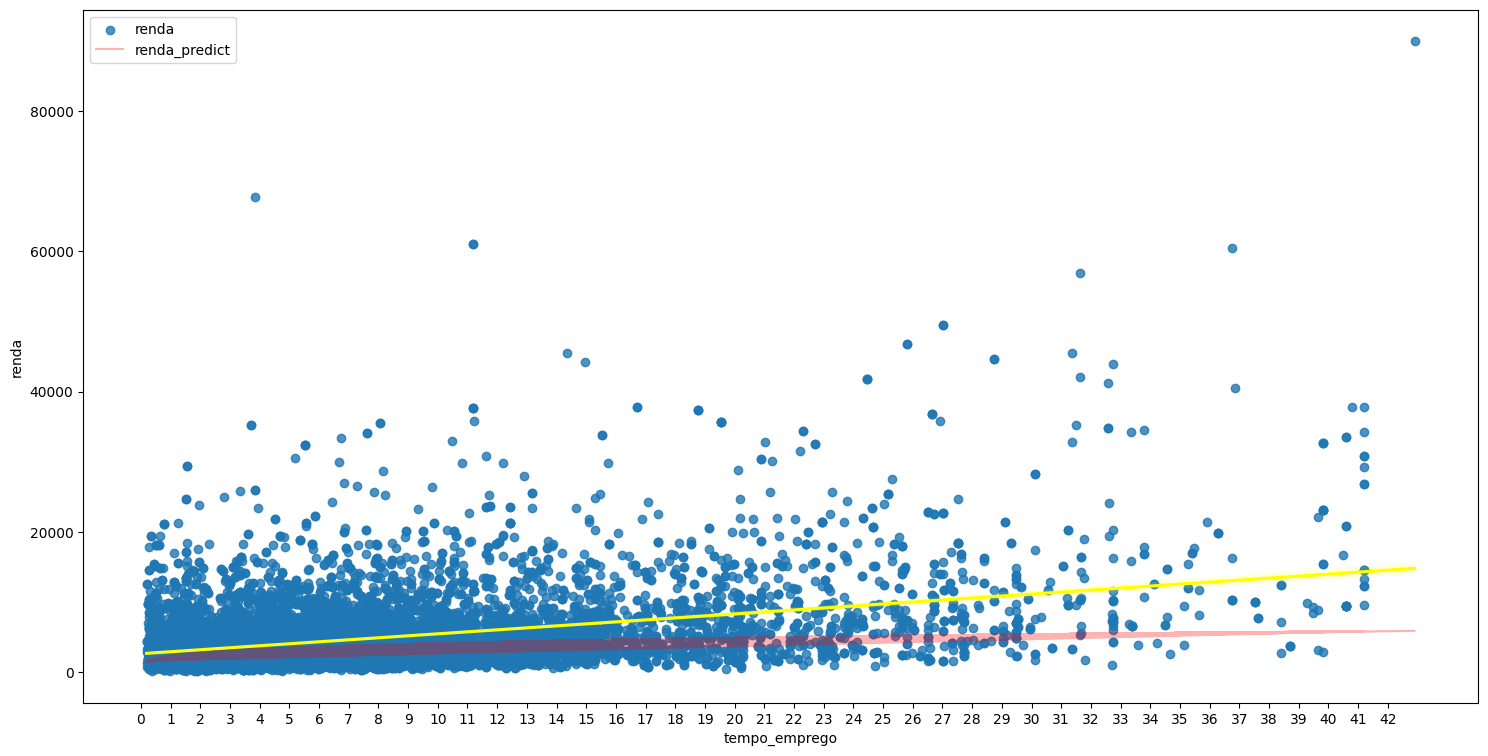

In [92]:
plt.figure(figsize=(18,9))

sns.regplot(x='tempo_emprego',y='renda', data=df, label='renda', line_kws={'color': 'yellow'})
plt.plot(df['tempo_emprego'], df['renda_predict'],'r', alpha = 0.3, label='renda_predict')
plt.legend()
plt.xticks(ticks=np.arange(stop=df['tempo_emprego'].max(), step=1))
plt.show()

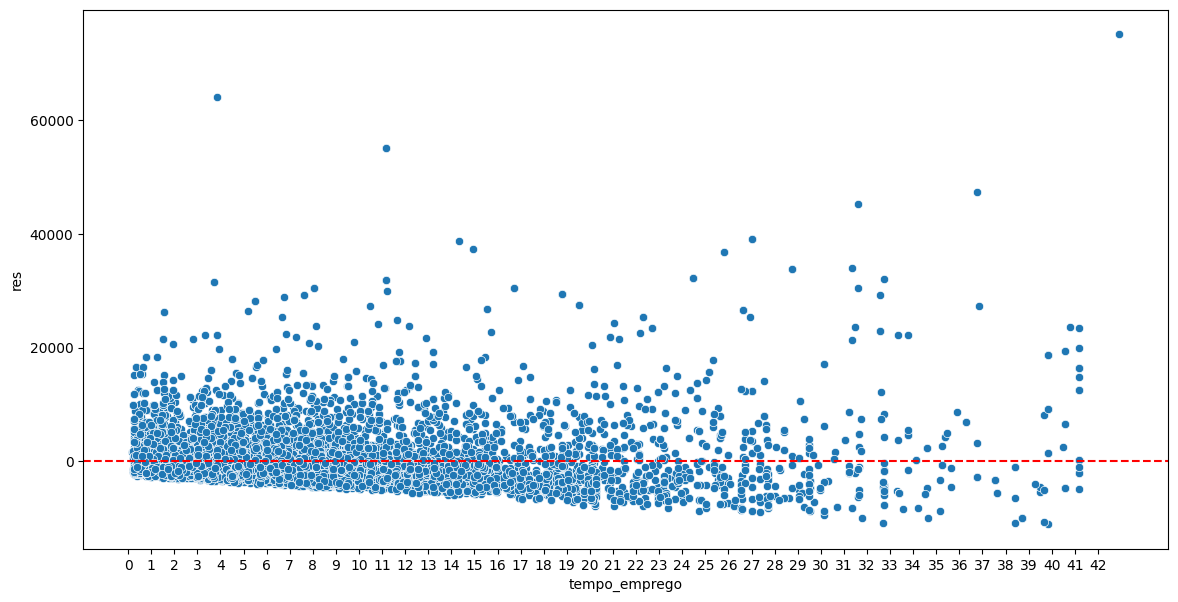

In [80]:
plt.figure(figsize=(14,7))

df['res'] = reg.resid

sns.scatterplot(x='tempo_emprego', y='res', data=df)
plt.axhline(y=0,color='r', linestyle='--')
plt.xticks(ticks=np.arange(stop=df['tempo_emprego'].max(),step=1))

plt.show()

In [41]:
#Fit a multiple linear regression model to explain income according to the other variables.
reg = smf.ols("renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia", data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:03:36   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -271.2003   1674.811     -0.162      0.871   -3554.089    3011.688
sexo[T.M]                         2366.1922     88.099     26.858      0.000    2193.505    2538.879
posse_de_veiculo[T.True]           -79.1270     84.709     -0.934      0.350    -245.169      86.915
posse_de_imovel[T.True]            349.0015     83.426      4.183      0.000     185.473     512.530
tipo_renda[T.Bolsista]            -817.4651   2155.323     -0.379      0.704   -5042.231    3407.301
tipo_renda[T.Empresário]          1021.9116     90.142     11.337      0.000     845.219    1198.605
tipo_renda[T.Pensionista]         1725.6132   1437.300      1.201      0.230   -1091.716    4542.943
tipo_renda[T.Servidor público]     436.9668    130.511      3.348      0.001     181.145     692.788
educacao[T.Pós graduação]         2207.5583   1081.061      2.042      0.041      88.511    4326.606
educacao[T.Secundário]            -241.1964    437.786     -0.551      0.582   -1099.324     616.931
educacao[T.Superior completo]      338.2616    439.622      0.769      0.442    -523.465    1199.988
educacao[T.Superior incompleto]   -296.2056    470.976     -0.629      0.529   -1219.392     626.981
estado_civil[T.Separado]           141.9156    806.277      0.176      0.860   -1438.512    1722.343
estado_civil[T.Solteiro]           376.1573    791.461      0.475      0.635   -1175.228    1927.542
estado_civil[T.União]              -41.0497    143.754     -0.286      0.775    -322.829     240.730
estado_civil[T.Viúvo]              -41.1125    827.976     -0.050      0.960   -1664.073    1581.848
tipo_residencia[T.Casa]           -356.2809    328.620     -1.084      0.278   -1000.428     287.866
tipo_residencia[T.Com os pais]    -640.8115    368.489     -1.739      0.082   -1363.106      81.483
tipo_residencia[T.Comunitário]    -577.7117    634.059     -0.911      0.362   -1820.565     665.142
tipo_residencia[T.Estúdio]        -976.1765    547.353     -1.783      0.075   -2049.073      96.720
tipo_residencia[T.Governamental]  -883.1863    397.273     -2.223      0.026   -1661.903    -104.470
qtd_filhos                        -240.3254    789.406     -0.304      0.761   -1787.683    1307.032
idade                               29.8746      4.808      6.213      0.000      20.450      39.299
tempo_emprego                      299.3338      6.140     48.750      0.000     287.298     311.369
qt_pessoas_residencia              306.2508    787.902      0.389      0.698   -1238.159    1850.661
==============================================================================
Omnibus:                    10075.335   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432391.441
Skew:             

In [47]:
#Removing the non-significant variables and adjust the model again
reg_mult = smf.ols("np.log(renda) ~ sexo + posse_de_imovel + idade + tempo_emprego", data=df).fit()
reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     907.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:31:10   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.3732      0.030    243.856      0.000       7.314       7.432
sexo[T.M]                   0.4742      0.013     35.424      0.000       0.448       0.500
posse_de_imovel[T.True]     0.1018      0.013      7.649      0.000       0.076       0.128
idade                       0.0043      0.001      5.958      0.000       0.003       0.006
tempo_emprego               0.0479      0.001     48.283      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.272
Skew:                           0.011   Prob(JB):                        0.529
Kurtosis:                       3.045   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

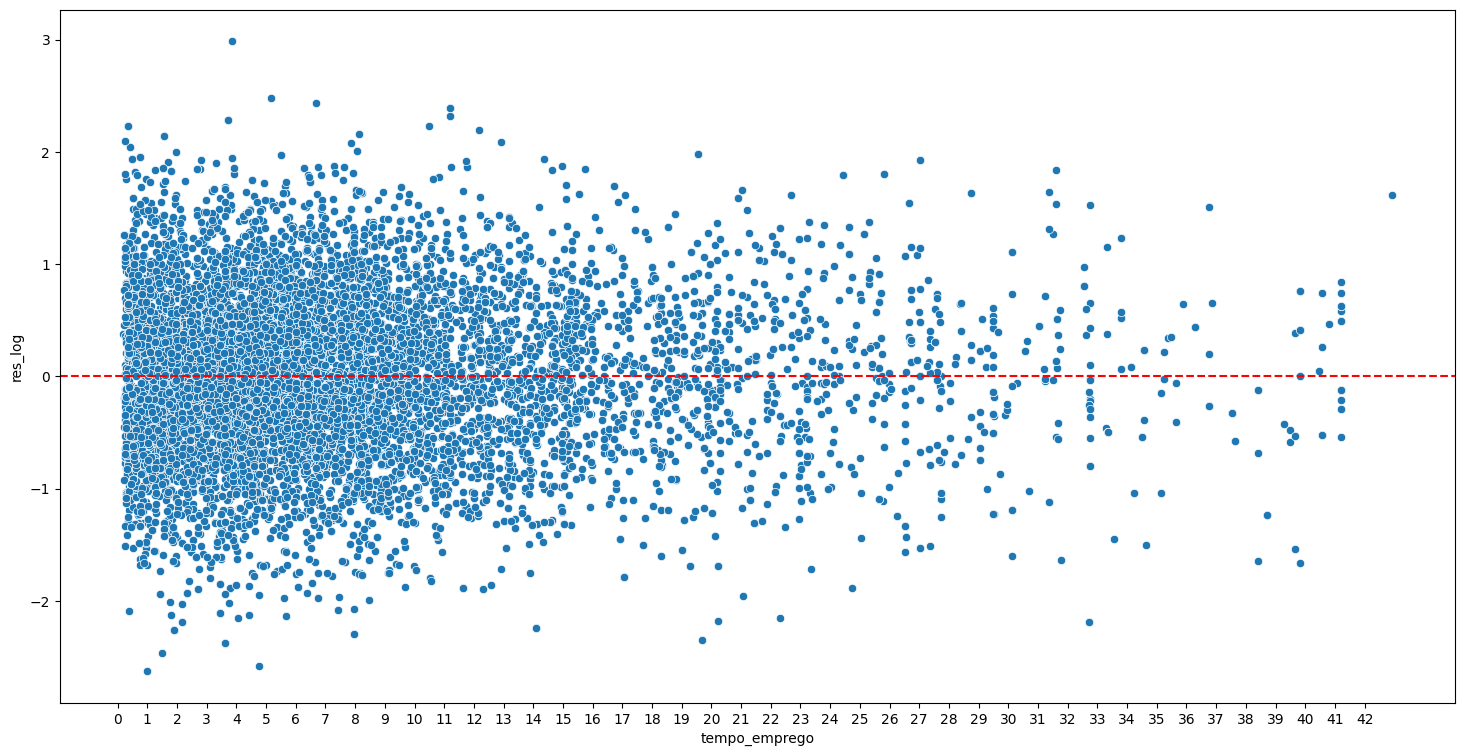

In [48]:
#Residual analysis. Evaluate the quality of the fit.
df['res_log'] = reg_mult.resid

plt.figure(figsize=(18,9))
sns.scatterplot(x='tempo_emprego', y='res_log', data=df)
plt.axhline(y=0,color='r', linestyle='--')
plt.xticks(ticks=np.arange(stop=df['tempo_emprego'].max(), step=1))

plt.show()

In [59]:
df['renda_predict_log'] = np.exp(reg_mult.predict(df))

`renda_predict` R-squared: 10.55 %
`renda_predict_log` R-squared: 22.71 %


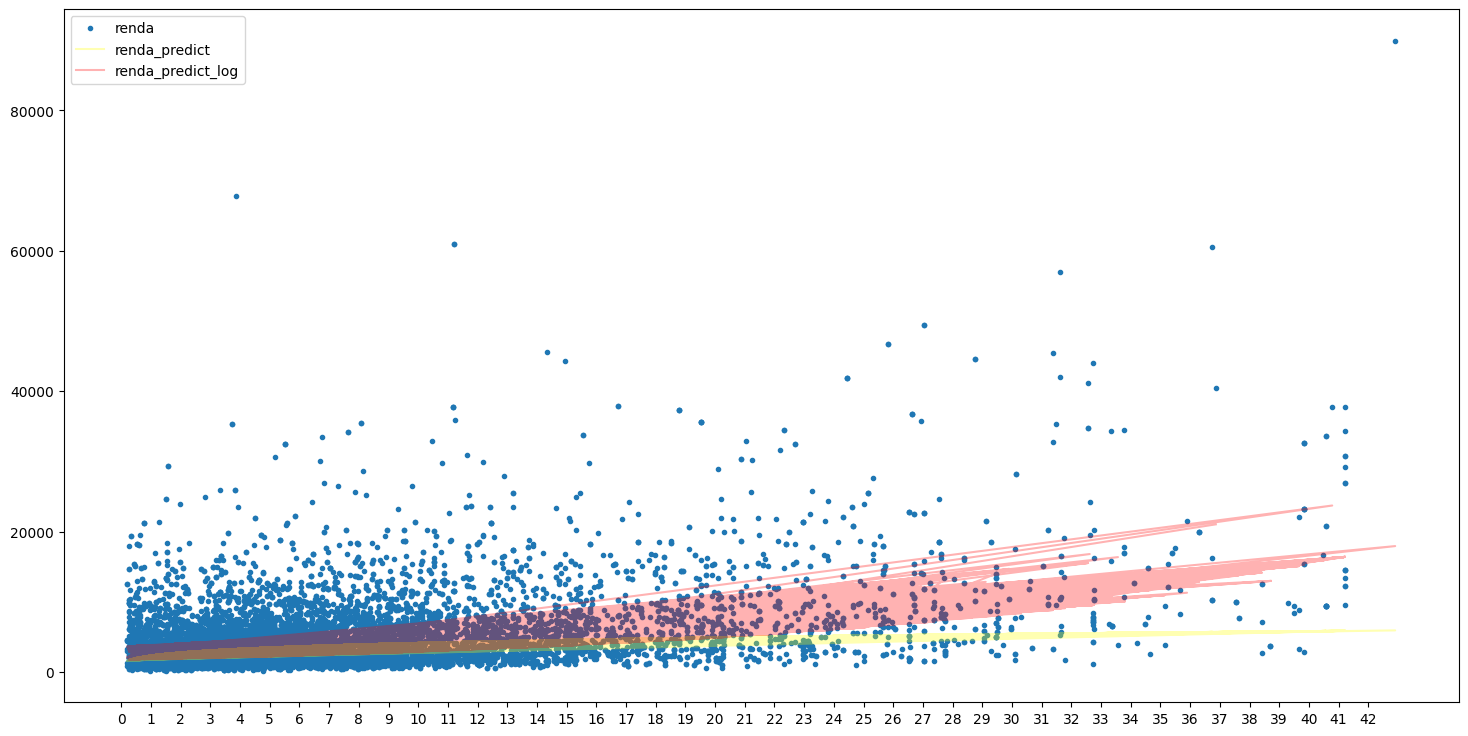

In [85]:
print('`renda_predict` R-squared:', round(df[['renda_predict', 'renda']].corr().iloc[0,1]**2 * 100, 2), '%')
print('`renda_predict_log` R-squared:', round(df[['renda_predict_log', 'renda']].corr().iloc[0,1]**2 * 100,2), '%')

plt.figure(figsize=(18,9))
plt.plot(df['tempo_emprego'],df['renda'],'.',label='renda')
plt.plot(df['tempo_emprego'],df['renda_predict'],'yellow',alpha=.3,label='renda_predict')
plt.plot(df['tempo_emprego'],df['renda_predict_log'],'red',alpha=.3,label='renda_predict_log')
plt.legend()
plt.xticks(ticks=np.arange(stop=df['tempo_emprego'].max(),step=1))
plt.show()

In [93]:
df[['sexo','posse_de_imovel','idade','tempo_emprego','renda','renda_predict','renda_predict_log','res', 'res_log']]

,sexo,posse_de_imovel,idade,tempo_emprego,renda,renda_predict,renda_predict_log,res,res_log
0,F,True,36,3.575342,3369.24,3185.490769,2441.768596,-297.781680,0.321965
1,M,True,42,0.860274,6096.14,2234.399072,3534.949789,3198.435291,0.544957
2,M,True,31,8.065753,5658.98,3900.626165,4760.368853,719.596548,0.172919
3,F,False,50,1.208219,7246.69,2431.542714,2090.978234,4250.394720,1.242913
4,M,False,52,13.873973,4017.37,4464.512754,6211.711429,-2567.777305,-0.435809
...,...,...,...,...,...,...,...,...,...
14995,M,True,37,2.046575,1193.29,2772.427723,3662.069660,-2040.554213,-1.121314
14996,M,True,30,12.079452,2519.18,4313.197205,5743.648211,-3557.488379,-0.824161
14997,F,True,40,2.161644,1586.85,2810.439220,2321.526931,-1679.598969,-0.380474
14998,F,True,47,3.295890,6975.39,3121.601978,2525.676024,3387.551297,1.015879
